In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

# For visvalization
import matplotlib.pyplot as plt

from pandas import DataFrame

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.ar_model import AR

from matplotlib.font_manager import FontProperties

%matplotlib inline

# 1. Analyze the Overall Condition of SocialSupport

In [2]:
df_h_social = pd.read_csv('../dataset/correlation_clustered_data/SS_clustered_cleaned_data_WA.csv')
df_h_social = df_h_social.iloc[2:]
df_h_social

,Log GDP per capita,Social support,Selected,Country name,Cluster,Silhouette
2,0.20074712983785067,0.28796378465179184,No,Afghanistan,C5,0.6479923158664037
3,0.5544295182861878,0.5861435091277891,No,Albania,C2,0.6140022100910224
4,0.5343479997632856,0.733753010902637,No,Algeria,C2,0.633366918225364
5,0.6726254586341579,0.8788349391480731,No,Argentina,C4,0.5722635621341505
6,0.5418710794176826,0.6523252620013523,No,Armenia,C2,0.648242064607946
...,...,...,...,...,...,...
138,0.5450282577819862,0.8605476673427992,No,Venezuela,C4,0.6237523069231735
139,0.4291772694993491,0.7792910267555299,No,Vietnam,C2,0.6088876637347659
140,0.25678704580423733,0.6886462559161597,No,Yemen,C3,0.6427392454190048
141,0.2901445437329862,0.6357019100743746,No,Zambia,C3,0.651431601155858


In [3]:
c1_h_social_countries = df_h_social[df_h_social['Cluster'] == 'C1']['Country name']

In [4]:
c1_list = c1_h_social_countries.values.tolist()
print(c1_list)

['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Taiwan Province of China', 'United Arab Emirates', 'United Kingdom', 'United States']


In [5]:
invalid = ['Somalia', 'Maldives', 'Central African Republic', 'Gambia', 
                     'Lesotho', 'North Cyprus', 'Syria', 'Comoros', 'Belize'
                     , 'Cuba', 'Oman', 'Suriname', 'Djibouti', 
                     'Somaliland region', 'Kosovo', 'Palestinian Territories',
                     'Burundi', 'Qatar', 'South Sudan', 'Swaziland', 'Bhutan',
                     'Taiwan Province of China', 'Hong Kong S.A.R. of China',
                     'Angola', 'Namibia', 'Libya', 'Trinidad and Tobago', 
                     'Sudan', 'Jamaica', 'Guyana']

for country in c1_list:
    if country in invalid:
        c1_list.remove(country)
        print("Removed ", country)

Removed  Hong Kong S.A.R. of China
Removed  Taiwan Province of China


In [6]:
df_ts = pd.read_csv('../dataset/normalized_filled_clean_data/normalized-filled-clean-world-happiness-report.csv')

In [7]:
df_c1 = df_ts[df_ts['Country name'].isin(c1_list)]
# non_normalization_list = ['Country name', 'year']
# columns = list(df_ts.columns)

# def normalization(x, xmin, xmax):
#     result = (x-xmin)/(xmax-xmin)
#     return result

# for column in columns:
#     if column not in non_normalization_list:
#         df_c1[column] = normalization(df_c1[column],df_c1[column].min(),df_c1[column].max())
        
# for column in columns:
#     if column not in non_normalization_list:
#         print(str(column), " xmin: ", df_ts[column].min() , " xmax: ", df_ts[column].max() )

In [8]:
#2006 - 2021
init = 2006
years = []
for i in range(16):
    years.append(init)
    init += 1

In [9]:
def get_yrly_avg_dict(df, years, col_item):
    avg_trend = {}
    for year in years:
        mean = df[df['year'] == year][col_item].mean()
        avg_trend[year] = mean
#     print(avg_trend)
    return avg_trend

In [10]:
def plot_by_dict(dis_dict, title, xlabel, ylabel):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=16)
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.show()

    
def plot_acf_by_dict(dis_dict, lags):
    avg = []
    for a in dis_dict.values():
        avg.append(a)
    avg = pd.Series(avg)
    plot_acf(avg, lags=lags)
    
def plot_pacf_by_dict(dis_dict, lags):
    avg = []
    for a in dis_dict.values():
        avg.append(a)
    avg = pd.Series(avg)
    plot_pacf(avg, lags=lags)

In [11]:
def trendline(data, order=1):
    coeffs = np.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]
    return float(slope)


def sort_dict(dis_dict):
    return {k: v for k, v in sorted(dis_dict.items(), key=lambda item: item[1])}

# Basic Plotting

{2006: 0.9255747126436782, 2007: 0.9227969348659002, 2008: 0.9078817733990147, 2009: 0.9107006020799124, 2010: 0.9140599343185554, 2011: 0.9109811165845649, 2012: 0.9045977011494255, 2013: 0.8980911330049259, 2014: 0.8871715927750414, 2015: 0.8927339901477834, 2016: 0.9071018062397375, 2017: 0.8977011494252874, 2018: 0.9032430213464698, 2019: 0.908477011494253, 2020: 0.917097701149425, 2021: 0.9094827586206898}


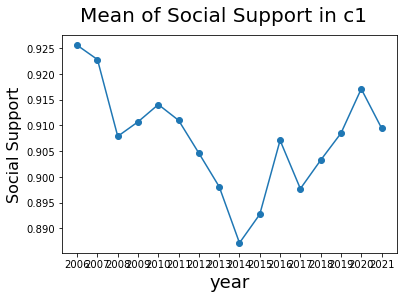

In [12]:
c1_social_avg_trend = get_yrly_avg_dict(df_c1, years, col_item = 'Social support')
print(c1_social_avg_trend)
plot_by_dict(c1_social_avg_trend, "Mean of Social Support in c1", "year", "Social Support")

# Differencing Plot

array([<AxesSubplot:>], dtype=object)

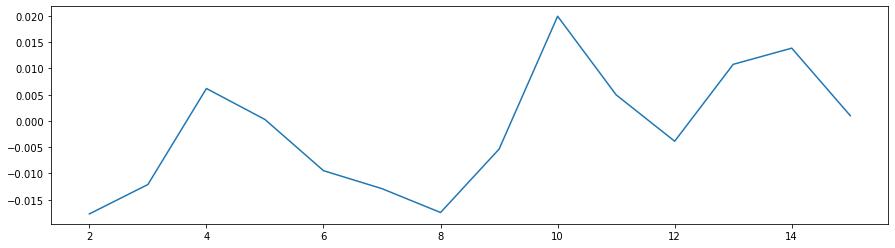

In [13]:
ser = pd.Series(c1_social_avg_trend.values())
ser.diff(periods=2).plot(subplots=True, figsize=(15,4))

# ACF, PACF Analysis

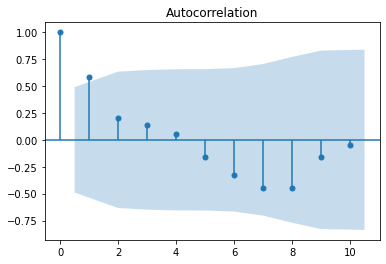

In [14]:
plot_acf_by_dict(c1_social_avg_trend, lags=10)

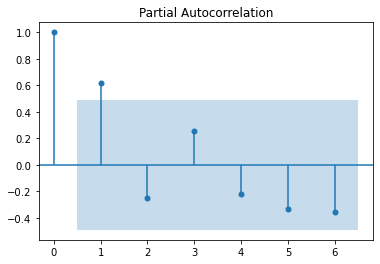

In [15]:
plot_pacf_by_dict(c1_social_avg_trend, lags=6)

# ARIMA Model Analysis

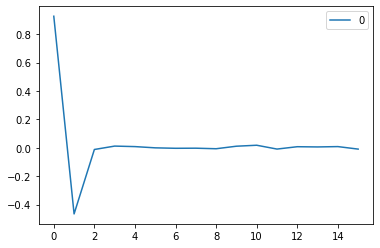

In [16]:
c1_avg = []
for a in c1_social_avg_trend.values():
    c1_avg.append(a)
    
c1_model = ARIMA(c1_avg, order=(0,2,1))
c1_model_fit = c1_model.fit()

residuals = DataFrame(c1_model_fit.resid)
residuals.plot()
plt.show()

# ARIMA Model Prediction

In [17]:
X = np.asarray(c1_avg)
X

array([0.92557471, 0.92279693, 0.90788177, 0.9107006 , 0.91405993,
       0.91098112, 0.9045977 , 0.89809113, 0.88717159, 0.89273399,
       0.90710181, 0.89770115, 0.90324302, 0.90847701, 0.9170977 ,
       0.90948276])

predicted=0.894756, expected=0.903243
predicted=0.902056, expected=0.908477
predicted=0.908815, expected=0.917098
predicted=0.919879, expected=0.909483
Test RMSE: 0.009


C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


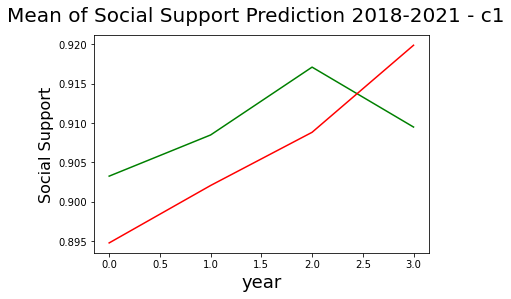

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# split into train and test sets
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
# print(history)
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,2,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
fig = plt.figure()
fig.suptitle('Mean of Social Support Prediction 2018-2021 - c1', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('Social Support', fontsize=16)
plt.plot(test, color='green')
plt.plot(predictions, color='red')
plt.show()

In [19]:
# X_ = list(X)
# predictions = list()
# # walk-forward validation

# for t in range(5):
# 	model = ARIMA(X_, order=(1,2,1))
# 	model_fit = model.fit()
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	X_.append(yhat)
# 	print('predicted=%f' % (yhat))

# Verify the Performance of the chosen model

In [20]:
import pmdarima as pm
pm_model = pm.auto_arima(c1_avg, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(pm_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-85.794, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-82.600, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-83.191, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-87.728, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-83.530, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-86.606, Time=0.03 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.154 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 1)   Log Likelihood                  45.864
Date:                Tue, 06 Jul 2021   AIC                            -87.728
Time:                        00:31:21   BIC                            -86.450
Sample:                           

# Predict the Social Support 2022 - 2026

In [21]:
all_countries_future_social = {}
future_years = [2022,2023,2024,2025,2026]

for country in c1_list:
    data = df_c1[df_c1['Country name'] == country]['Social support']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    X_ = list(data.values)
    single_future_data = {}
    
    for year in future_years:
        model = ARIMA(X_, order=(1,2,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        X_.append(yhat)
        single_future_data[year] = yhat
    
    all_countries_future_social[country] = single_future_data

C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_re

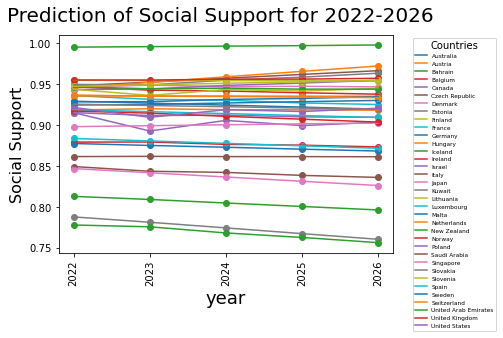

In [22]:
fig = plt.figure()
fig.suptitle("Prediction of Social Support for 2022-2026", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("Social Support", fontsize=16)

for country in c1_list:
    dis_dict = all_countries_future_social[country]
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.xticks(rotation=90)
    
fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c1_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

Text(0.5, 1.0, 'Trend of Social Support for 2022-2026')

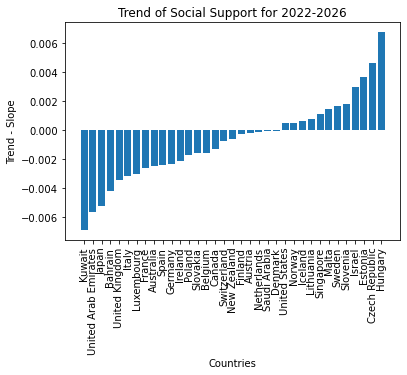

In [23]:
future_social_dict = {}
for country in c1_list:
    data = list( all_countries_future_social[country].values() )
    index = list( all_countries_future_social[country].keys() )
    coeffs = np.polyfit(index, data, 1)
    slope = coeffs[-2]
    future_social_dict[country] = slope

future_social_dict = sort_dict(future_social_dict)

social_support_keys = future_social_dict.keys()
social_support_values = future_social_dict.values()
plt.xticks(rotation=90)
plt.bar(social_support_keys, social_support_values)

plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of Social Support for 2022-2026")

# Predict the GDP 2022-2026

In [24]:
all_countries_future_gdp = {}
future_years = [2022,2023,2024,2025,2026]

for country in c1_list:
    data = df_c1[df_c1['Country name'] == country]['Log GDP per capita']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    X_ = list(data.values)
    single_future_data = {}
    
    for year in future_years:
        model = ARIMA(X_, order=(0,1,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        X_.append(yhat)
        single_future_data[year] = yhat
    
    all_countries_future_gdp[country] = single_future_data

C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaco

C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


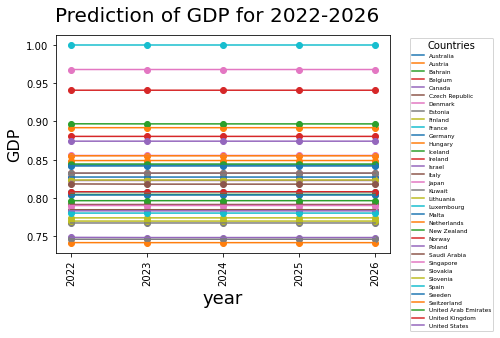

In [25]:
fig = plt.figure()
fig.suptitle("Prediction of GDP for 2022-2026", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("GDP", fontsize=16)

for country in c1_list:
    dis_dict = all_countries_future_gdp[country]
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.xticks(rotation=90)
    
fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c1_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

Text(0.5, 1.0, 'Trend of GDP for 2022-2026')

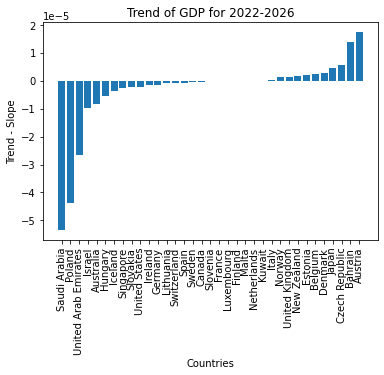

In [26]:
future_gdp_dict = {}
for country in c1_list:
    data = list( all_countries_future_gdp[country].values() )
    index = list( all_countries_future_gdp[country].keys() )
    coeffs = np.polyfit(index, data, 1)
    slope = coeffs[-2]
    future_gdp_dict[country] = slope

future_gdp_dict = sort_dict(future_gdp_dict)

gdp_keys = future_gdp_dict.keys()
gdp_values = future_gdp_dict.values()
plt.xticks(rotation=90)
plt.bar(gdp_keys, gdp_values)

plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of GDP for 2022-2026")

# Trend Comparison 

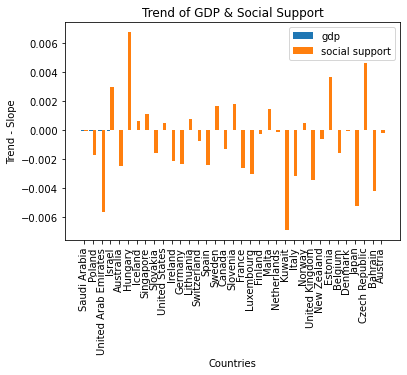

In [27]:
plt.xticks(rotation=90)

ss_values_sorted_by_gdp = []

X = list(gdp_keys)


for country in X:
    ss_values_sorted_by_gdp.append(future_social_dict[country])

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, future_gdp_dict.values(), 0.4, label = 'gdp')
plt.bar(X_axis + 0.2, ss_values_sorted_by_gdp, 0.4, label = 'social support')
  
plt.xticks(X_axis, X)
plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of GDP & Social Support")
plt.legend()
plt.show() 

# Seasonal Analysis

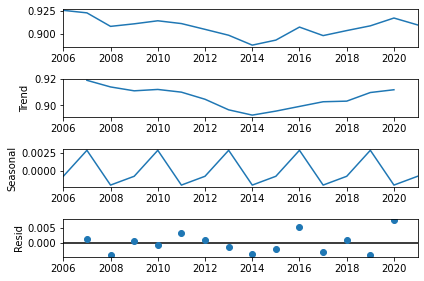

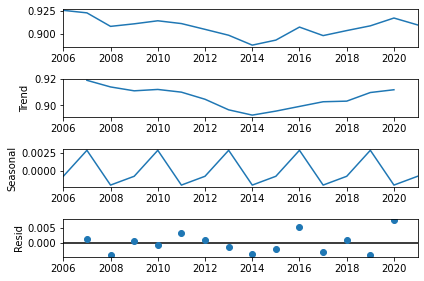

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

da = pd.DataFrame(
    { 'value': c1_avg }, 
    index=pd.period_range(
        '2006-01-01',
         freq='A',
         periods=16
    ))

# da = da.interpolate(inplace = True)
da.index = da.index.to_timestamp()

result = seasonal_decompose(da, model='additive',period=3)
result.plot()
# result.trend.plot()

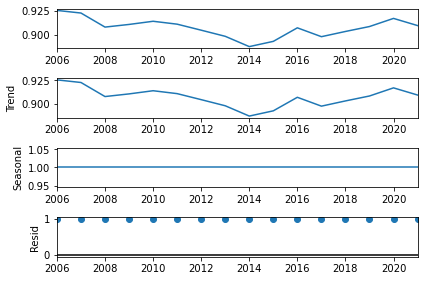

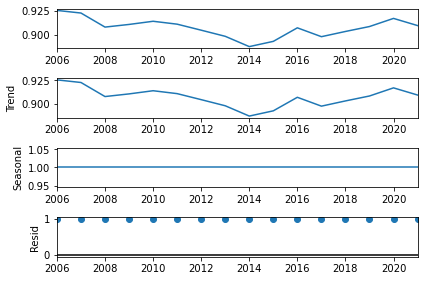

In [29]:
result = seasonal_decompose(da, model='multiplicative',period=1)
result.plot()

# 2. Condition of SocialSupport by Countries

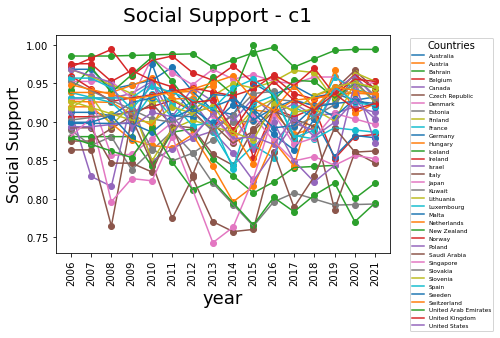

In [30]:
fig = plt.figure()
fig.suptitle("Social Support - c1", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("Social Support", fontsize=16)

for country in c1_list:
    data = df_c1[df_c1['Country name'] == country]['Social support']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.xticks(rotation=90)
    
fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c1_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

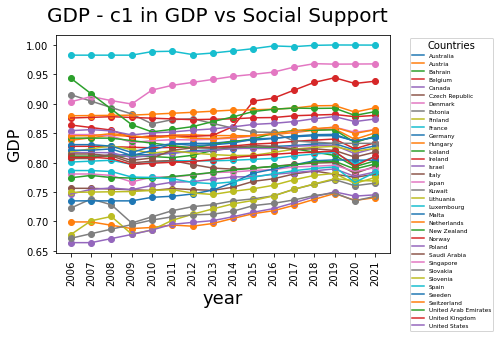

In [31]:
fig = plt.figure()
fig.suptitle("GDP - c1 in GDP vs Social Support", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("GDP", fontsize=16)

for country in c1_list:
    data = df_c1[df_c1['Country name'] == country]['Log GDP per capita']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.xticks(rotation=90)
    
fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c1_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

# 3. Forecastability of a SocialSupport for c1 Countries

The more regular and repeatable patterns a time series has, the easier it is to forecast. The ‘Approximate Entropy’ can be used to quantify the regularity and unpredictability of fluctuations in a time series.

The higher the approximate entropy, the more difficult it is to forecast it.

Another better alternate is the ‘Sample Entropy’.

Sample Entropy is similar to approximate entropy but is more consistent in estimating the complexity even for smaller time series. For example, a random time series with fewer data points can have a lower ‘approximate entropy’ than a more ‘regular’ time series, whereas, a longer random time series will have a higher ‘approximate entropy’.

In [32]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
#         print(N, " ", m)
        if (N - m + 1) == 0:
             return np.nan
        return (N - m + 1)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

<BarContainer object of 35 artists>

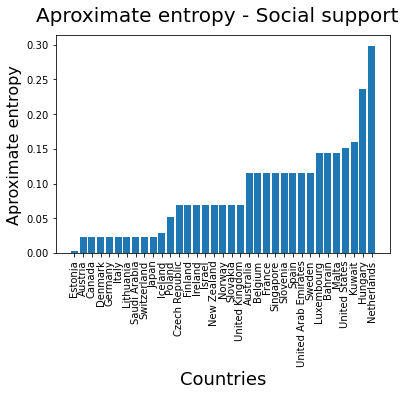

In [33]:
AE_dict = {}

for country in c1_list:
    data = df_c1[df_c1['Country name'] == country]['Social support']
    data.index = np.arange(0, 16)
    AE = ApEn(data, m=2, r=0.2*np.std(data))
    AE_dict[country] = AE


# The Lower the approximate entropy, 
# the Easier it is to forecast it. 
Sorted_AE_dict = sort_dict(AE_dict)


fig = plt.figure()
fig.suptitle("Aproximate entropy - Social support", fontsize=20)
plt.xlabel("Countries", fontsize=18)
plt.ylabel("Aproximate entropy", fontsize=16)

AE_keys = Sorted_AE_dict.keys()
AE_values = Sorted_AE_dict.values()
plt.xticks(rotation=90)
plt.bar(AE_keys, AE_values)

<BarContainer object of 35 artists>

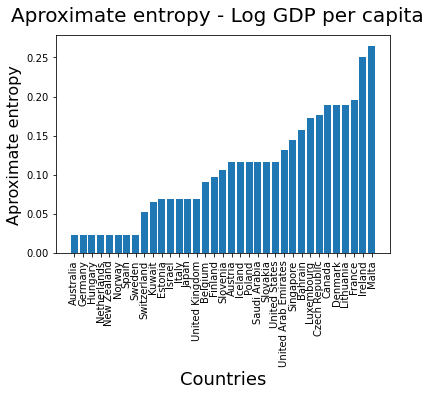

In [34]:
AE_dict = {}

for country in c1_list:
    data = df_c1[df_c1['Country name'] == country]['Log GDP per capita']
    data.index = np.arange(0, 16)
    AE = ApEn(data, m=2, r=0.2*np.std(data))
    AE_dict[country] = AE


# The Lower the approximate entropy, 
# the Easier it is to forecast it. 
Sorted_AE_dict = sort_dict(AE_dict)


fig = plt.figure()
fig.suptitle("Aproximate entropy - Log GDP per capita", fontsize=20)
plt.xlabel("Countries", fontsize=18)
plt.ylabel("Aproximate entropy", fontsize=16)

AE_keys = Sorted_AE_dict.keys()
AE_values = Sorted_AE_dict.values()
plt.xticks(rotation=90)
plt.bar(AE_keys, AE_values)

In [35]:
top5_countries_AE  = list(Sorted_AE_dict)[:5]
top5_countries_name = list(Sorted_AE_dict.keys())[:5]

bottom5_countries_AE = list(Sorted_AE_dict)[-5:]
bottom5_countries_name = list(Sorted_AE_dict.keys())[-5:]

print(top5_countries_AE)
print(bottom5_countries_AE)

['Australia', 'Germany', 'Hungary', 'Netherlands', 'New Zealand']
['Denmark', 'Lithuania', 'France', 'Ireland', 'Malta']


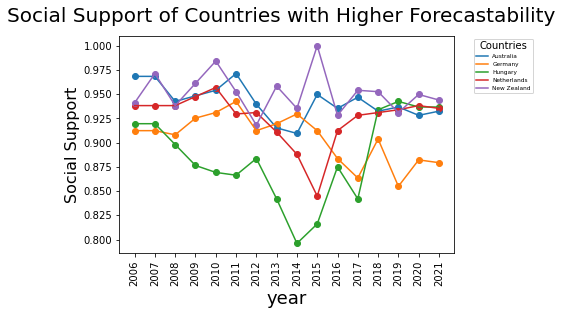

In [36]:
fig = plt.figure()
fig.suptitle("Social Support of Countries with Higher Forecastability", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("Social Support", fontsize=16)

for country in top5_countries_name:
    data = df_c1[df_c1['Country name'] == country]['Social support']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.xticks(rotation=90)
    
fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(top5_countries_name, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

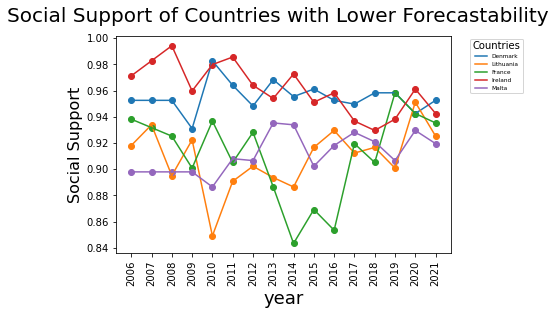

In [37]:
fig = plt.figure()
fig.suptitle("Social Support of Countries with Lower Forecastability", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("Social Support", fontsize=16)

for country in bottom5_countries_name:
    data = df_c1[df_c1['Country name'] == country]['Social support']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.xticks(rotation=90)
    
fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(bottom5_countries_name, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

# 4. Upward Trend - Slope:

In [38]:
def trendline(data, order=1):
    coeffs = np.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]
    return float(slope)

Text(0.5, 1.0, 'Trend of Social Support')

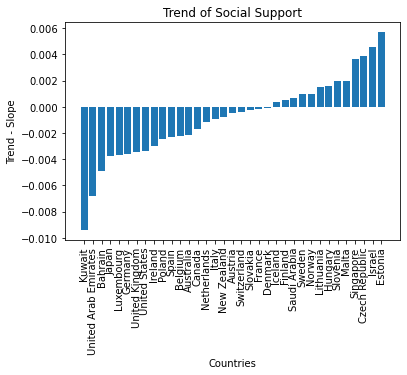

In [39]:
social_support_trend_dict = {}
for country in c1_list:
    data = df_c1[df_c1['Country name'] == country]['Social support']
    social_support_trend_dict[country] = trendline(data)

social_support_trend_dict = sort_dict(social_support_trend_dict)

social_support_keys = social_support_trend_dict.keys()
social_support_values = social_support_trend_dict.values()
plt.xticks(rotation=90)
plt.bar(social_support_keys, social_support_values)

plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of Social Support")

Text(0.5, 1.0, 'Trend of GDP')

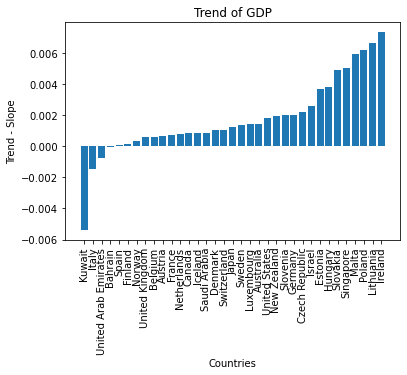

In [40]:
gdp_trend_dict = {}
for country in c1_list:
    data = df_c1[df_c1['Country name'] == country]['Log GDP per capita']
    gdp_trend_dict[country] = trendline(data)

gdp_trend_dict = sort_dict(gdp_trend_dict)

gdp_keys = gdp_trend_dict.keys()
gdp_values = gdp_trend_dict.values()
plt.xticks(rotation=90)
plt.bar(gdp_keys, gdp_values)

plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of GDP")

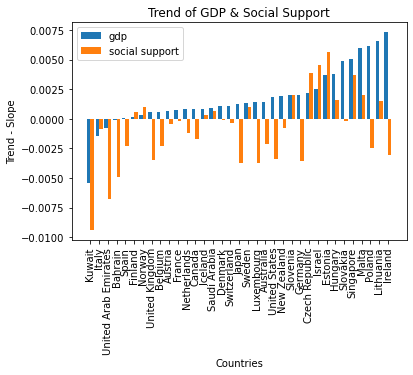

In [41]:
plt.xticks(rotation=90)

ss_values_sorted_by_gdp = []

X = list(gdp_keys)


for country in X:
    ss_values_sorted_by_gdp.append(social_support_trend_dict[country])

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, gdp_values, 0.4, label = 'gdp')
plt.bar(X_axis + 0.2, ss_values_sorted_by_gdp, 0.4, label = 'social support')
  
plt.xticks(X_axis, X)
plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of GDP & Social Support")
plt.legend()
plt.show() 

# plt.legend(["gdp","social support"], title='Indexes', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)